### Figure 3 - Ice Surface Elevation

Ice surface elevation at T15, relative to January 2020. Ice surface elevation extracted from ATL15 (Smith et al., 2023a), with observations provided at 3-month intervals. 

In [13]:
# IMPORT REQUIRED MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [14]:
# OPEN THE SAMPLED ATL15 OUTPUT CSV FILE 
ATL15_data = pd.read_csv(r'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_elevation_ATL15/ATL15_delta_h_sampled.csv')

# DEFINE THE ELEVATION (DELTA_H) VARIABLE FOR THE POINT WITH THE HIGHEST 'DATA_COUNT' (T15)
POINT4_ELEVATION = ATL15_data['POINT_4']

# DEFINE THE DATE VARIABLE
ATL15_data['DATE'] = pd.to_datetime(ATL15_data['DATE'], format='%d/%m/%Y')

# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Year'
ytitle = 'Ice surface elevation \n relative to 01/2020 (m)'

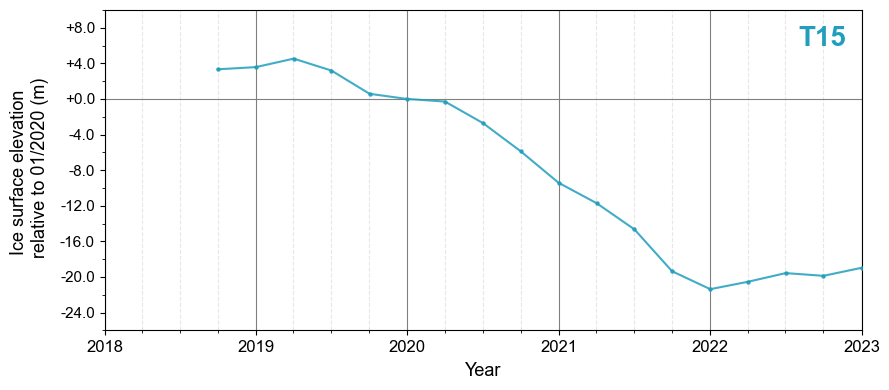

In [15]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(9, 4))
plt.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
plt.ylabel(ytitle, labelpad=8, fontsize=13)
plt.xlabel(xtitle, labelpad=5, fontsize=13)

# PLOT A SCATTER PLOT FOR T15
sc4 = plt.scatter(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', s=5, marker='o', alpha=0.85, label='T15', zorder=20)

# PLOT A LINE PLOT FOR T15
plt.plot(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', alpha=0.85, label='T15', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -24
max_y_value = 8
interval_y = 4

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
plt.ylim(bottom=min_y_value-2, top=max_y_value+2)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=2)
ax.yaxis.set_minor_locator(minor_locator)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)
plt.text(0.98, 0.95, 'T15', transform=ax.transAxes, fontsize=20, verticalalignment='top', horizontalalignment='right', weight='bold', color='#219ebc')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
plt.tight_layout()
plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_3.png', dpi=300)